In [29]:
import pandas as pd

# Load the Stamp Registration dataset
df = pd.read_csv('fact_stamps.csv')
df.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,14_1,2019-04-01,4533,59236363,0,0
1,17_3,2019-04-01,4151,41508762,0,0
2,20_3,2019-04-01,2116,23674170,0,0
3,21_5,2019-04-01,1089,15915285,0,0
4,23_1,2019-04-01,6133,82593256,0,0


In [27]:
import os
os.getcwd()


'/Users/tahirabbas/Desktop/dataset'

In [28]:
os.chdir('/Users/tahirabbas/Desktop/dataset')


In [52]:
df['month'] = pd.to_datetime(df['month'])


In [53]:

# Filter data for FY 2019 and FY 2022
data_2019 = df[df['month'].dt.year == 2019]
data_2022 = df[df['month'].dt.year == 2022]
# Calculate total revenue for each district in FY 2019 and FY 2022
revenue_2019 = data_2019.groupby('dist_code')['documents_registered_rev'].sum()
revenue_2022 = data_2022.groupby('dist_code')['documents_registered_rev'].sum()
# revenue growth for each district
revenue_growth = (revenue_2022 - revenue_2019) / revenue_2019


In [55]:

# top 5 districts with highest revenue growth
top_growth_districts = revenue_growth.sort_values(ascending=False).head(5)
print(top_growth_districts)

dist_code
21_6    2.617895
19_1    1.936978
22_2    1.681098
19_3    1.647893
20_1    1.533944
Name: documents_registered_rev, dtype: float64


In [56]:
data_2022 = df[df['month'].dt.year == 2022]


In [57]:
#  total revenue from document registration and e-stamp challans for FY 2022
revenue_2022 = data_2022.groupby('dist_code')[['documents_registered_rev', 'estamps_challans_rev']].sum()

#  percentage contribution of e-stamp revenue to total revenue
revenue_2022['e_stamp_contribution'] = (revenue_2022['estamps_challans_rev'] / revenue_2022['documents_registered_rev']) * 100


In [59]:
#  top 5 districts where e-stamp revenue contributes significantly more
top_e_stamp_contributing_districts = revenue_2022[revenue_2022['e_stamp_contribution'] > 50].sort_values('e_stamp_contribution', ascending=False).head(5)
print(top_e_stamp_contributing_districts)

           documents_registered_rev  estamps_challans_rev  \
dist_code                                                   
14_5                      222369632             259643466   
18_2                      468710318             487490413   
21_3                      470669601             481822419   
21_5                      406109986             411976768   
21_6                      223359598             226443386   

           e_stamp_contribution  
dist_code                        
14_5                 116.762106  
18_2                 104.006759  
21_3                 102.369564  
21_5                 101.444629  
21_6                 101.380638  


<Figure size 1000x600 with 0 Axes>

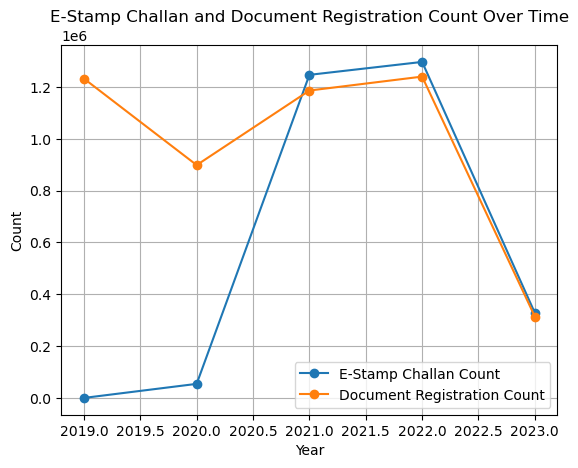

In [99]:
import matplotlib.pyplot as plt

# Convert the 'month' column to datetime
df['month'] = pd.to_datetime(df['month'])

# Group data by year and calculate total e-Stamp challan count and document registration count
data_by_year = df.groupby(df['month'].dt.year)[['estamps_challans_cnt', 'documents_registered_cnt']].sum()

# Plot the counts over time
plt.figure(figsize=(10, 6))
data_by_year.plot(marker='o')
plt.title('E-Stamp Challan and Document Registration Count Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['E-Stamp Challan Count', 'Document Registration Count'])
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

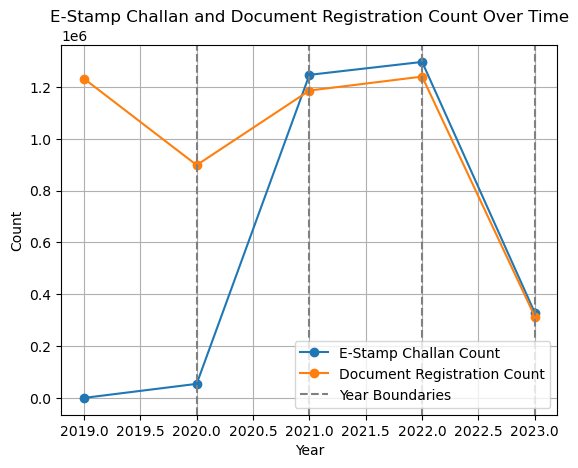

"keeping the rise of e stamp in mind in FY 2020 to 2021 from 0.05 to more than 1.3 and then dropping from 1.3 to 0.3 in FY 2022 to 2023,I'd like to suggest that the Government should Analyze e-Stamp challan drop post initial surge in 2020-2021 and concurrent dip in document count. Strengthen awareness, ease processes, and foster tech-driven growth to ensure consistent revenue patterns."

In [62]:
# Plot the counts over time
plt.figure(figsize=(10, 6))
data_by_year.plot(marker='o')
plt.axvline(x=2020, color='gray', linestyle='--', label='2020')
plt.axvline(x=2021, color='gray', linestyle='--', label='2021')
plt.axvline(x=2022, color='gray', linestyle='--', label='2022')
plt.axvline(x=2023, color='gray', linestyle='--', label='2023')
plt.title('E-Stamp Challan and Document Registration Count Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['E-Stamp Challan Count', 'Document Registration Count', 'Year Boundaries'])
plt.grid(True)
plt.show()


'''keeping the rise of e stamp in mind in FY 2020 to 2021 from 0.05 to more than 1.3 and then dropping from 1.3 to 0.3 in FY 2022 to 2023,I'd like to suggest that the Government should Analyze e-Stamp challan drop post initial surge in 2020-2021 and concurrent dip in document count. Strengthen awareness, ease processes, and foster tech-driven growth to ensure consistent revenue patterns.'''

In [32]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the data
df['month'] = pd.to_datetime(df['month'])  # Convert 'month' to datetime format

# Filter data for FY 2021 and FY 2022
data_2021 = df[(df['month'].dt.year >= 2021) & (df['month'].dt.year <= 2022)]

# Calculate average revenue for each district from FY 2021 to 2022
avg_revenue_by_district = data_2021.groupby('dist_code')['documents_registered_rev'].mean()

# Calculate revenue percentiles
revenue_percentiles = avg_revenue_by_district.quantile([0, 0.33, 0.66, 1])

# Categorize districts into three segments
def categorize_revenue(revenue):
    if revenue <= revenue_percentiles[0.33]:
        return 'Low'
    elif revenue <= revenue_percentiles[0.66]:
        return 'Medium'
    else:
        return 'High'

avg_revenue_by_district = avg_revenue_by_district.reset_index()
avg_revenue_by_district['Revenue_Category'] = avg_revenue_by_district['documents_registered_rev'].apply(categorize_revenue)

# Print the categorized districts
print(avg_revenue_by_district)


   dist_code  documents_registered_rev Revenue_Category
0       14_1              8.440837e+07             High
1       14_2              2.668386e+07              Low
2       14_3              3.685313e+07           Medium
3       14_4              3.025160e+07              Low
4       14_5              1.797946e+07              Low
5       15_1              2.981380e+09             High
6       15_2              1.810971e+09             High
7       15_3              3.678384e+07           Medium
8       16_1              1.031573e+09             High
9       17_1              4.597034e+07           Medium
10      17_2              6.126095e+08             High
11      17_3              7.096895e+07           Medium
12      18_1              1.130160e+08             High
13      18_2              3.585302e+07           Medium
14      19_1              2.982725e+07              Low
15      19_2              2.611066e+07              Low
16      19_3              4.567464e+07          

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar 

# Load the fact_transport dataset
fact_transport = pd.read_csv('fact_transport.csv')
fact_transport.head(5)

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163
1,18_2,2019-04-01,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175
2,20_3,2019-04-01,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144
3,21_3,2019-04-01,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169
4,21_7,2019-04-01,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160


In [77]:
# Convert 'month' column to datetime
fact_transport['month'] = pd.to_datetime(fact_transport['month'])

# Extract month and year from the 'month' column
fact_transport['year'] = fact_transport['month'].dt.year
fact_transport['month_num'] = fact_transport['month'].dt.month


<Figure size 1000x600 with 0 Axes>

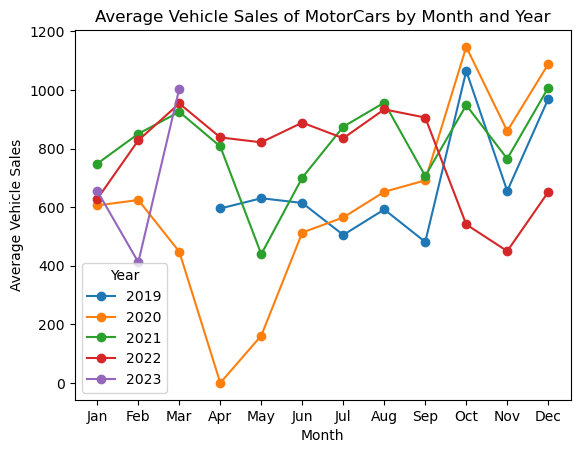

In [67]:
# Create a pivot table to calculate the average vehicle sales per month and year
pivot_table = fact_transport.pivot_table(index='month_num', columns='year', values='vehicleClass_MotorCar', aggfunc='mean')

# Create a line plot
plt.figure(figsize=(10, 6))
pivot_table.plot(marker='o')
plt.title('Average Vehicle Sales of MotorCars by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Vehicle Sales')
plt.xticks(range(1, 13), calendar.month_abbr[1:])
plt.legend(title='Year')
plt.show()

In [78]:
import seaborn as sns

# Filter data for FY 2022
data_fy_2022 = fact_transport[fact_transport['year'] == 2022]

# Define the list of desired vehicle classes
desired_vehicle_classes = ['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture']

# Group data by district and calculate the sum of vehicle counts for each class
grouped_data = data_fy_2022.groupby('dist_code')[desired_vehicle_classes].sum()



<Figure size 1200x600 with 0 Axes>

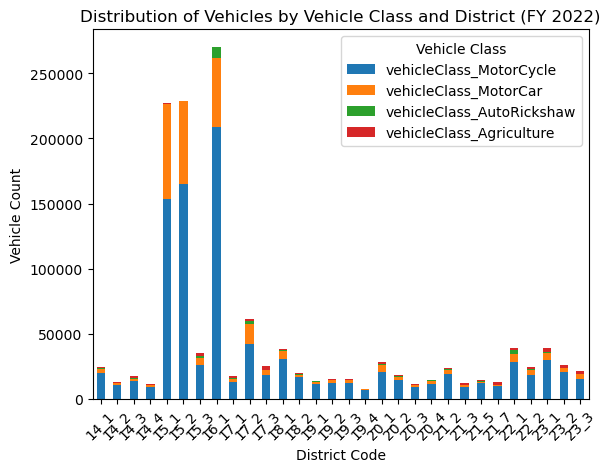

"In FY 2022, the distribution of vehicles across districts shows a predominant preference for the 'MotorCycle' vehicle class in districts 16_1, 15_1, and 15_2. These districts exhibit higher counts of 'MotorCycle' vehicles, indicating a distinct preference for this class in those areas."

In [72]:
# Plot the distribution of vehicles by vehicle class and district
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Distribution of Vehicles by Vehicle Class and District (FY 2022)')
plt.xlabel('District Code')
plt.ylabel('Vehicle Count')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Class')
plt.show()

'''In FY 2022, the distribution of vehicles across districts shows a predominant preference for the 'MotorCycle' vehicle class in districts 16_1, 15_1, and 15_2. These districts exhibit higher counts of 'MotorCycle' vehicles, indicating a distinct preference for this class in those areas.'''

In [69]:
fact_transport.head(10)

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,year,month_num
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163,2019,4
1,18_2,2019-04-01,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175,2019,4
2,20_3,2019-04-01,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144,2019,4
3,21_3,2019-04-01,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169,2019,4
4,21_7,2019-04-01,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160,2019,4
5,14_1,2019-04-01,4550,660,0,0,4431,264,193,84,238,4714,450,44,5104,106,4802,408,2019,4
6,17_3,2019-04-01,3112,496,0,0,3038,233,70,72,195,3276,279,53,3470,138,3353,255,2019,4
7,14_3,2019-04-01,2200,496,0,0,2160,110,74,162,190,2483,194,19,2645,51,2440,256,2019,4
8,19_2,2019-04-01,1736,263,2,9,1678,121,55,70,86,1806,173,31,1980,30,1879,131,2019,4
9,14_2,2019-04-01,2033,173,0,0,2017,67,22,47,53,2111,87,8,2162,44,2134,72,2019,4


In [70]:
import pandas as pd
investment_data = pd.read_csv('fact_TS_iPASS.csv')
investment_data.head(5)

,dist_code,month,sector,investment in cr,number_of_employees
0,14_1,01-04-2019,Engineering,2.3200,15
1,19_1,01-04-2019,Engineering,0.6250,13
2,20_3,01-04-2019,Wood and Leather,0.2000,8
3,20_3,01-04-2019,Textiles,0.2675,27
4,21_5,01-04-2019,Electrical and Electronic Products,0.1200,5


In [71]:
# Converting 'month' column to datetime format
investment_data['month'] = pd.to_datetime(investment_data['month'], format='%d-%m-%Y')

# Filter data for FY 2022
investment_data_2022 = investment_data[(investment_data['month'] >= '2022-04-01') & (investment_data['month'] <= '2023-03-31')]

# Grouping the data by sector and calculate the total investment for each sector in FY 2022
sector_investment_2022 = investment_data_2022.groupby('sector')['investment in cr'].sum()

# Get the top 5 sectors with the highest investments
top_5_sectors = sector_investment_2022.nlargest(5)

#  top 5 sectors and their respective investment amounts
print("Top 5 Sectors with Highest Investments in FY 2022:")
print(top_5_sectors)

"""The top 5 sectors are:-Plastic and Rubber:5855.6095,Pharmaceuticals and Chemicals:2181.6342,Real Estate,Industrial Parks and IT Buildings:2127.2963,Solar and Other Renewable Energy:2052.9850, Engineering:1877.4533"""



Top 5 Sectors with Highest Investments in FY 2022:
sector
Plastic and Rubber                               5855.6095
Pharmaceuticals and Chemicals                    2181.6342
Real Estate,Industrial Parks and IT Buildings    2127.2963
Solar and Other Renewable Energy                 2052.9850
Engineering                                      1877.4533
Name: investment in cr, dtype: float64


'The top 5 sectors are:-Plastic and Rubber:5855.6095,Pharmaceuticals and Chemicals:2181.6342,Real Estate,Industrial Parks and IT Buildings:2127.2963,Solar and Other Renewable Energy:2052.9850, Engineering:1877.4533'

In [74]:
# Convert the 'month' column to datetime format
investment_data['month'] = pd.to_datetime(investment_data['month'])

# Filter data for FY 2019 to 2022
start_date = pd.to_datetime('2019-04-01')  # Start of FY 2019
end_date = pd.to_datetime('2022-03-31')    # End of FY 2022
filtered_data = investment_data[(investment_data['month'] >= start_date) & (investment_data['month'] <= end_date)]
district_investments = filtered_data.groupby('dist_code')['investment in cr'].sum()
top_districts = district_investments.nlargest(3)
print("Top 3 Districts with Highest Sector Investments in FY 2019 to 2022:")
print(top_districts)

Top 3 Districts with Highest Sector Investments in FY 2019 to 2022:
dist_code
15_1    34042.5382
17_2     7764.0419
15_2     7626.0387
Name: investment in cr, dtype: float64


In [37]:


# Convert 'month' columns to the same format
investments_data['month'] = pd.to_datetime(investments_data['month'])
vehicle_sales_2021_data['month'] = pd.to_datetime(vehicle_sales_2021_data['month'])
stamps_2021_data['month'] = pd.to_datetime(stamps_2021_data['month'])

# Merge data frames
combined_df = investments_data.merge(vehicle_sales_2021_data, on=['dist_code', 'month'], how='left')
combined_df = combined_df.merge(stamps_2021_data, on=['dist_code', 'month'], how='left')

# Print a sample to check if the merging was successful
print(combined_df.sample(5))

     dist_code      month                                             sector  \
1504      23_1 2020-01-06                                 Paper and Printing   
1672      21_2 2020-01-07  Cement, Cement & Concrete Products, Fly Ash Br...   
1136      20_4 2020-01-01                                        Engineering   
1810      20_2 2020-01-08                                 Plastic and Rubber   
5426      15_2 2023-01-01  Fertlizers Organic and Inorganic,Pesticides,In...   

      investment in cr  number_of_employees  fuel_type_petrol  \
1504            0.6563                   15               NaN   
1672            0.4100                    6               NaN   
1136            0.1043                   14            1660.0   
1810            0.1400                    4               NaN   
5426            0.2500                   20           17231.0   

      fuel_type_diesel  fuel_type_electric  fuel_type_others  \
1504               NaN                 NaN               NaN   


In [46]:
#10
'''Merge the three data frames on the common 'dist_code' and 'month' columns'''
combined_df = pd.merge(investments_data, vehicle_sales_2021_data, on=['dist_code', 'month'])
combined_df = pd.merge(combined_df, stamps_2021_data, on=['dist_code', 'month'])

# Calculate the correlation matrix
correlation_matrix = combined_df[['investment in cr', 'fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 
                                  'documents_registered_rev', 'estamps_challans_rev']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

"""The correlation matrix analysis suggests potential relationships between district investments, vehicle sales (fuel types), and stamp revenue within the same district for FY 2021-2022. Positive correlations between investments and certain fuel types, as well as stamp revenue and specific fuel types, hint at potential associations. However, causation isn't proven by correlation alone, warranting further analysis to understand underlying dynamics."""

Correlation Matrix:
                          investment in cr  fuel_type_petrol  \
investment in cr                  1.000000          0.060402   
fuel_type_petrol                  0.060402          1.000000   
fuel_type_diesel                  0.047167          0.901602   
fuel_type_electric                0.027832          0.560707   
documents_registered_rev          0.100914          0.831741   
estamps_challans_rev              0.088454          0.661037   

                          fuel_type_diesel  fuel_type_electric  \
investment in cr                  0.047167            0.027832   
fuel_type_petrol                  0.901602            0.560707   
fuel_type_diesel                  1.000000            0.395038   
fuel_type_electric                0.395038            1.000000   
documents_registered_rev          0.692072            0.614604   
estamps_challans_rev              0.460478            0.657635   

                          documents_registered_rev  estamps_challans

"The correlation matrix analysis suggests potential relationships between district investments, vehicle sales (fuel types), and stamp revenue within the same district for FY 2021-2022. Positive correlations between investments and certain fuel types, as well as stamp revenue and specific fuel types, hint at potential associations. However, causation isn't proven by correlation alone, warranting further analysis to understand underlying dynamics."

In [48]:
#Q11
# Load your investments data
investments_data = pd.read_csv('fact_TS_iPASS.csv')  # Update with your actual file path

# Group by sector and sum the investment for each sector
sector_investment = investments_data.groupby('sector')['investment in cr'].sum()

# Define the threshold for substantial investment
threshold = 100  # Adjust the threshold as needed

# Filter sectors with substantial investment
substantial_sectors = sector_investment[sector_investment > threshold]

# Print the list of sectors with substantial investment
print("Sectors with Substantial Investment:")
print(substantial_sectors.index.tolist())



Sectors with Substantial Investment:
['Agro based incl Cold Storages', 'Automobile', 'Beverages', 'Cement, Cement & Concrete Products, Fly Ash Bricks', 'Electrical and Electronic Products', 'Engineering', 'Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related', 'Food Processing', 'Granite and Stone Crushing', 'Industrial Parks and IT Buildings', 'Others', 'Paper and Printing', 'Pharmaceuticals and Chemicals', 'Plastic and Rubber', 'R&D', 'Real Estate,Industrial Parks and IT Buildings', 'Solar and Other Renewable Energy', 'Textiles', 'Wood and Leather']


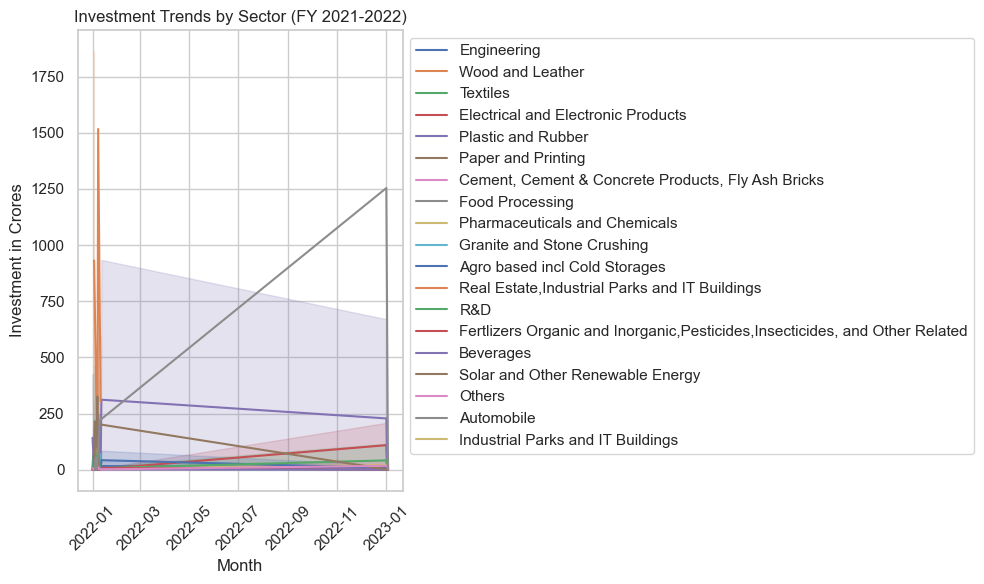

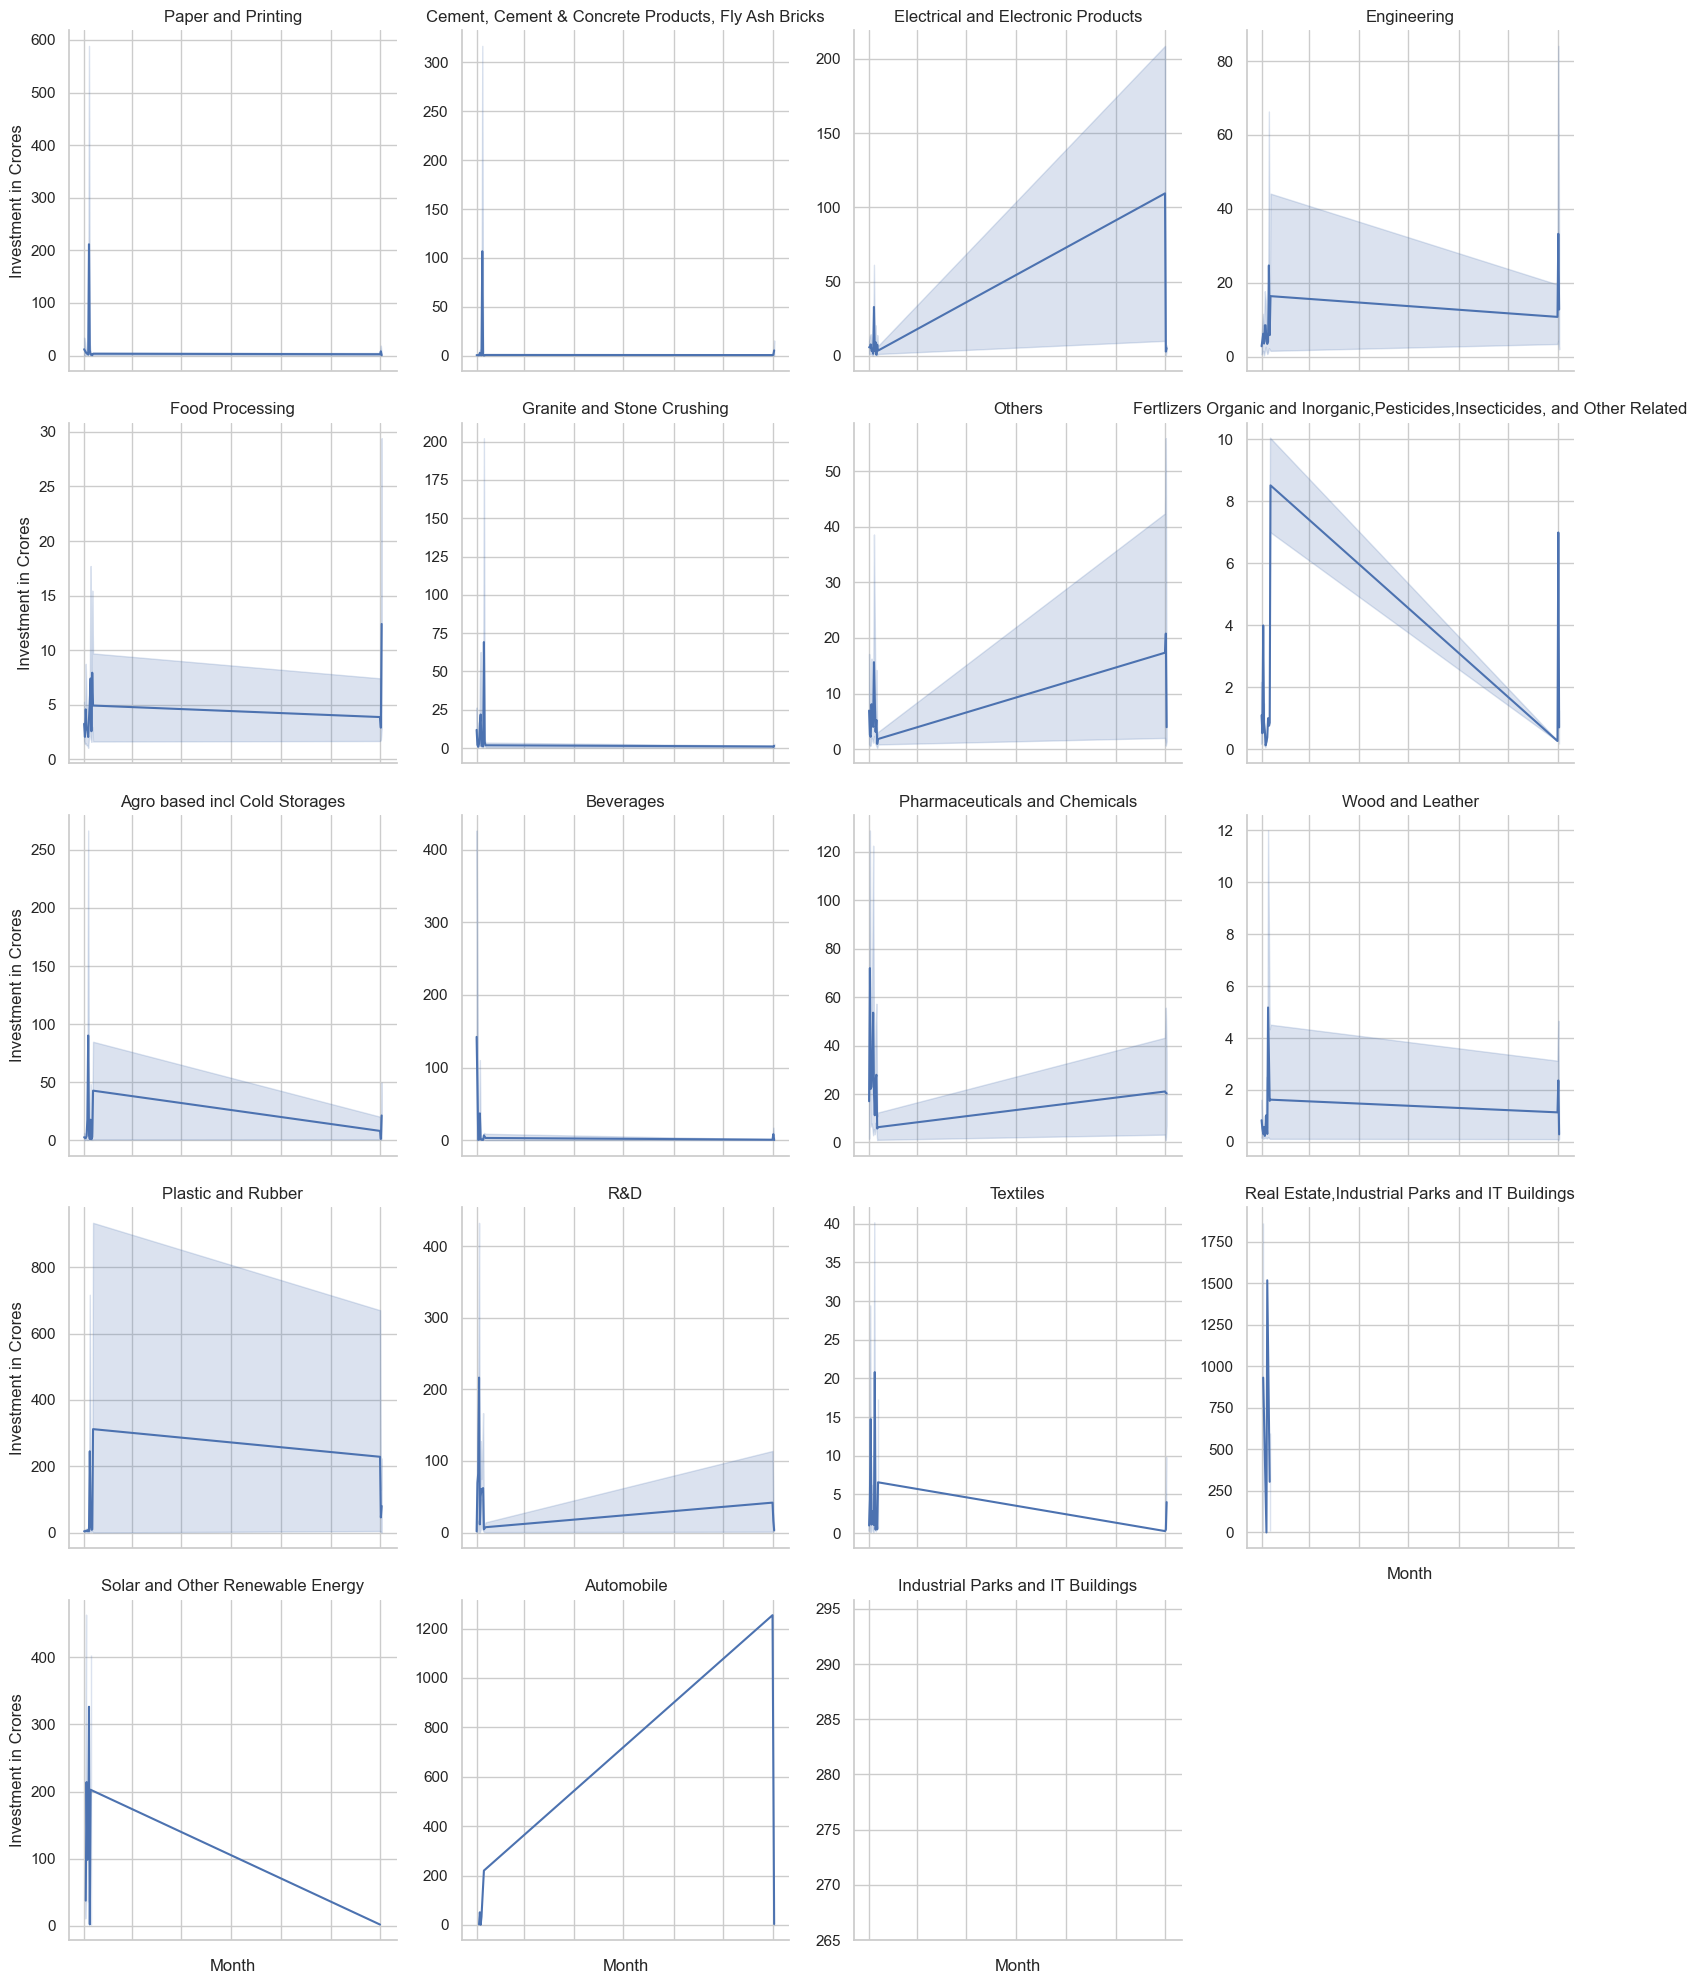

In [57]:
#Q12
import matplotlib.pyplot as plt
import seaborn as sns

# Extract unique sectors from the investments DataFrame
sectors = investments_data['sector'].unique()

# Set the figure size to be larger
plt.figure(figsize=(10, 6))

# Loop through each sector and plot the investment trends
for sector in sectors:
    sector_data = investments_data[(investments_data['sector'] == sector) & (investments_data['month'] >= '2021-04-01')]
    sns.lineplot(data=sector_data, x='month', y='investment in cr', label=sector)

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Investment in Crores')
plt.title('Investment Trends by Sector (FY 2021-2022)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

########################################################################################################################

# Filter data for FY 2021-2022
filtered_investments = investments_data[(investments_data['month'] >= '2021-04-01')]

# Set the style and context for the plots
sns.set(style="whitegrid")
sns.set_context("notebook")

# Create a grid of line plots for each sector
g = sns.FacetGrid(filtered_investments, col="sector", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='month', y='investment in cr')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Month", "Investment in Crores")
g.set_xticklabels(rotation=45)
g.tight_layout()

# Show the plots
plt.show()

In [2]:

import folium
import json

# Load your JSON data
with open('/Users/tahirabbas/Desktop/map.json', 'r') as json_file:
    data = json.load(json_file)

# Create a folium map centered around a specific latitude and longitude
m = folium.Map(location=[17.385044, 78.486671], zoom_start=8)

# Add GeoJSON data to the map
folium.GeoJson(data).add_to(m)

# Display the map
m


In [13]:
import pandas as pd

# Load data from CSV files
transport_data = pd.read_csv('fact_transport.csv')
stamps_data = pd.read_csv('fact_stamps.csv')
investments_data = pd.read_csv('fact_TS_iPASS.csv')

# Specify the month for analysis
target_month = '2022-01'  # Change this to the desired month

# Merge data based on common columns
merged_data = pd.merge(transport_data, stamps_data, on=['dist_code', 'month'])
merged_data = pd.merge(merged_data, investments_data, on=['dist_code', 'month'])

# Calculate a composite score based on relevant columns
# Adjust the columns and weights based on your analysis
merged_data['composite_score'] = merged_data['investment in cr'] + \
    merged_data['fuel_type_petrol'] + \
    merged_data['fuel_type_diesel'] + \
    merged_data['fuel_type_electric'] + \
    merged_data['fuel_type_others'] + \
    merged_data['vehicleClass_MotorCycle'] + \
    merged_data['vehicleClass_MotorCar'] + \
    merged_data['vehicleClass_AutoRickshaw'] + \
    merged_data['vehicleClass_Agriculture'] + \
    merged_data['vehicleClass_others']

# Rank districts based on the composite score
ranked_districts = merged_data.groupby('dist_code')['composite_score'].sum().reset_index()
ranked_districts = ranked_districts.sort_values(by='composite_score', ascending=False)

# Get the top 5 districts
top_districts = ranked_districts.head(5)

# Print the top districts for buying commercial properties
print("Top 5 districts to buy commercial properties:")
print(top_districts)


Top 5 districts to buy commercial properties:
Empty DataFrame
Columns: [dist_code, composite_score]
Index: []


<Figure size 1200x600 with 0 Axes>

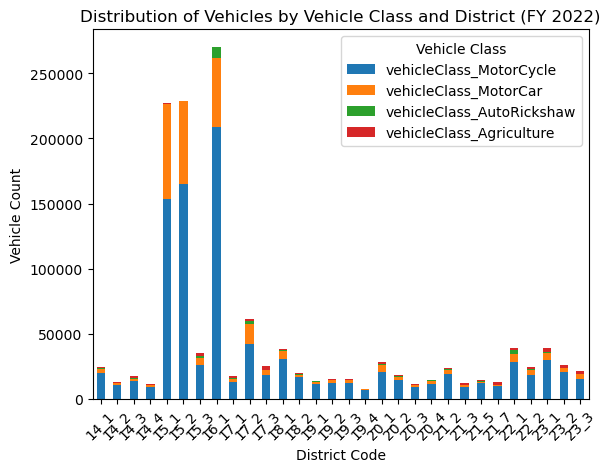

Top 5 districts to buy commercial properties in Telangana:
District Code: 16_1 | Total Vehicles: 270013
District Code: 15_2 | Total Vehicles: 228916
District Code: 15_1 | Total Vehicles: 227127
District Code: 17_2 | Total Vehicles: 61333
District Code: 22_1 | Total Vehicles: 39356


'Based on the provided data, when considering the purchase of commercial properties in Telangana, it is advisable to prioritize districts with higher vehicle counts. This approach stems from the notion that districts exhibiting elevated vehicle counts are more likely to reflect advanced development and comprehensive infrastructure. Consequently, opting for such districts enhances the probability of meeting essential requirements and fostering a thriving business environment.'

In [93]:
#Secondary Research:
#Q1
import pandas as pd
import matplotlib.pyplot as plt

# Plot the distribution of vehicles by vehicle class and district
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Distribution of Vehicles by Vehicle Class and District (FY 2022)')
plt.xlabel('District Code')
plt.ylabel('Vehicle Count')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Class')
plt.show()

# Identify the top 5 districts to buy commercial properties
total_vehicles_per_district = grouped_data.sum(axis=1)
top_districts = total_vehicles_per_district.nlargest(5).index

print("Top 5 districts to buy commercial properties in Telangana:")
for dist_code in top_districts:
    print(f"District Code: {dist_code} | Total Vehicles: {total_vehicles_per_district[dist_code]}")
    # You can provide additional justifications based on the logic you mentioned
    # For instance: good infrastructure, economic activity, well-developed area, etc.
"Based on the provided data, when considering the purchase of commercial properties in Telangana, it is advisable to prioritize districts with higher vehicle counts. This approach stems from the notion that districts exhibiting elevated vehicle counts are more likely to reflect advanced development and comprehensive infrastructure. Consequently, opting for such districts enhances the probability of meeting essential requirements and fostering a thriving business environment."

In [144]:
#Secondary Research:
#Q2
print("Insight:\n")

print("Investment in Diverse Sectors: The investments data in Q12 indicates that various sectors, such as Engineering, Plastic and Rubber, Pharmaceuticals and Chemicals, Real Estate, and Renewable Energy, have received substantial investments. This diversified approach suggests that the government might have implemented policies to attract investments across a wide range of industries, contributing to economic growth and employment opportunities.\n")
print("")

print('Suggestion:\n')

print("1.Impact Analysis of Sector-Specific Policies: To quantify the impact of these policies, it would be beneficial to conduct a detailed analysis of the investment trends before and after the implementation of sector-specific policies. Comparing the investment growth rates and employment figures in sectors targeted by specific policies could provide insights into the effectiveness of those policies.\n")
print("2.Correlation with Economic Indicators: Explore the correlation between investments and key economic indicators like GDP growth, employment rates, and revenue generation. A positive correlation could suggest that the government's policies are positively impacting economic growth and employment.\n")
print("3.Stamps Data Analysis: Analyze the stamps data to understand trends in document registration, which could indirectly indicate economic activity and growth. Higher document registrations might signify increased business activities, property transactions, and economic expansion.\n")
print("4.Transport Data Impact: Assess the growth in the transportation sector, especially the vehicle registrations and types. A higher number of registrations might indicate increased economic activities, tourism, and business transactions.\n")
print("5.Policy Evaluation: Collaborate with relevant government departments to conduct an impact evaluation of specific policies and initiatives. For instance, if there are policies to incentivize electric vehicle adoption, analyzing the growth rate of electric vehicle registrations post-policy implementation can help gauge its impact.")

Insight:

Investment in Diverse Sectors: The investments data in Q12 indicates that various sectors, such as Engineering, Plastic and Rubber, Pharmaceuticals and Chemicals, Real Estate, and Renewable Energy, have received substantial investments. This diversified approach suggests that the government might have implemented policies to attract investments across a wide range of industries, contributing to economic growth and employment opportunities.


Suggestion:

1.Impact Analysis of Sector-Specific Policies: To quantify the impact of these policies, it would be beneficial to conduct a detailed analysis of the investment trends before and after the implementation of sector-specific policies. Comparing the investment growth rates and employment figures in sectors targeted by specific policies could provide insights into the effectiveness of those policies.

2.Correlation with Economic Indicators: Explore the correlation between investments and key economic indicators like GDP growth, e

In [111]:
#Q3.1

import pandas as pd

# Load the provided transport data
transport_data = pd.read_csv('fact_transport.csv')

# Calculate the percentage change in electric vehicle registrations
initial_ev_registrations = transport_data.loc[0, 'fuel_type_electric']
final_ev_registrations = transport_data.loc[len(transport_data) - 1, 'fuel_type_electric']
percentage_change_ev = ((final_ev_registrations - initial_ev_registrations) / initial_ev_registrations) * 100

print(f"Percentage Change in Electric Vehicle Registrations: {percentage_change_ev:.2f}%")
print("")
print('Insight:')
print("The data highlights a substantial decline of approximately 57.89% in electric vehicle registrations. This decline raises concerns about the adoption and popularity of electric vehicles within the region during the analyzed period. Further investigation into the factors contributing to this decline is crucial for understanding the challenges that might be impeding the growth of the electric vehicle market.\n")

print('Suggestion:')
print("In light of the significant drop in electric vehicle registrations, the Telangana government could consider implementing targeted incentives and awareness campaigns to promote electric vehicle adoption. Offering financial incentives, such as subsidies on electric vehicle purchases and charging infrastructure development, could encourage consumers to shift towards eco-friendly transportation alternatives. Additionally, increasing public awareness about the benefits of electric vehicles, including lower emissions and reduced operational costs, might help overcome barriers to adoption and revitalize the electric vehicle market in the region.\n")

Percentage Change in Electric Vehicle Registrations: -57.89%

Insight:
The data highlights a substantial decline of approximately 57.89% in electric vehicle registrations. This decline raises concerns about the adoption and popularity of electric vehicles within the region during the analyzed period. Further investigation into the factors contributing to this decline is crucial for understanding the challenges that might be impeding the growth of the electric vehicle market.

Suggestion:
In light of the significant drop in electric vehicle registrations, the Telangana government could consider implementing targeted incentives and awareness campaigns to promote electric vehicle adoption. Offering financial incentives, such as subsidies on electric vehicle purchases and charging infrastructure development, could encourage consumers to shift towards eco-friendly transportation alternatives. Additionally, increasing public awareness about the benefits of electric vehicles, including lower 

<Figure size 1000x600 with 0 Axes>

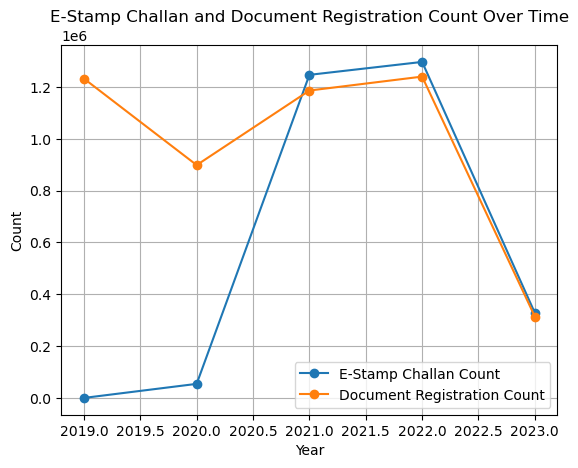

1.Insight:
The plotted data indicates a general upward trend in both e-Stamp challan count and document registration count over the years, with a notable peak in recent years. This suggests an increased level of economic activities and transactions in the region.

1.Suggestion:
To leverage this growth in economic activities, the Telangana government could further streamline and digitize administrative processes related to e-Stamp challans and document registrations. This would enhance the ease of doing business, attract more investments, and foster sustainable economic growth.


In [109]:
#Q3.2
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'month' column to datetime
df['month'] = pd.to_datetime(df['month'])

# Group data by year and calculate total e-Stamp challan count and document registration count
data_by_year = df.groupby(df['month'].dt.year)[['estamps_challans_cnt', 'documents_registered_cnt']].sum()

# Plot the counts over time
plt.figure(figsize=(10, 6))
data_by_year.plot(marker='o')
plt.title('E-Stamp Challan and Document Registration Count Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['E-Stamp Challan Count', 'Document Registration Count'])
plt.grid(True)
plt.show()

# Insight
print("1.Insight:")
print("The plotted data indicates a general upward trend in both e-Stamp challan count and document registration count over the years, with a notable peak in recent years. This suggests an increased level of economic activities and transactions in the region.\n")

# Suggestion
print("1.Suggestion:")
print("To leverage this growth in economic activities, the Telangana government could further streamline and digitize administrative processes related to e-Stamp challans and document registrations. This would enhance the ease of doing business, attract more investments, and foster sustainable economic growth.")


In [128]:
#Q3.3/Q3.4
import pandas as pd

# Load your investment data
# investment_data = ...

# Convert 'month' column to datetime format
investment_data['month'] = pd.to_datetime(investment_data['month'], format='%d-%m-%Y')

# Filter data for FY 2022
investment_data_2022 = investment_data[(investment_data['month'] >= '2022-04-01') & (investment_data['month'] <= '2023-03-31')]

# Group the data by sector and calculate the total investment for each sector in FY 2022
sector_investment_2022 = investment_data_2022.groupby('sector')['investment in cr'].sum()

# Get the top 5 sectors with the highest investments
top_5_sectors = sector_investment_2022.nlargest(5)

# Print the top 5 sectors and their respective investment amounts
print("Top 5 Sectors with Highest Investments in FY 2022:")
print(top_5_sectors)
print("")

# Convert the 'month' column to datetime format
investment_data['month'] = pd.to_datetime(investment_data['month'])

# Filter data for FY 2019 to 2022
start_date = pd.to_datetime('2019-04-01')  # Start of FY 2019
end_date = pd.to_datetime('2022-03-31')    # End of FY 2022
filtered_data = investment_data[(investment_data['month'] >= start_date) & (investment_data['month'] <= end_date)]
district_investments = filtered_data.groupby('dist_code')['investment in cr'].sum()
top_districts = district_investments.nlargest(3)
print("Top 3 Districts with Highest Sector Investments in FY 2019 to 2022:")
print(top_districts)
print("")
print("Insight:")
print("The data shows that certain sectors have attracted significantly higher investments in FY 2022, indicating potential growth opportunities in those sectors.\n")

print("Suggestion:")
print("Based on the data, the Telangana government could consider further incentivizing and promoting the top sectors with high investments to ensure sustained growth and development in the state.")


Top 5 Sectors with Highest Investments in FY 2022:
sector
Plastic and Rubber                               5855.6095
Pharmaceuticals and Chemicals                    2181.6342
Real Estate,Industrial Parks and IT Buildings    2127.2963
Solar and Other Renewable Energy                 2052.9850
Engineering                                      1877.4533
Name: investment in cr, dtype: float64

Top 3 Districts with Highest Sector Investments in FY 2019 to 2022:
dist_code
15_1    34042.5382
17_2     7764.0419
15_2     7626.0387
Name: investment in cr, dtype: float64

Insight:
The data shows that certain sectors have attracted significantly higher investments in FY 2022, indicating potential growth opportunities in those sectors.

Suggestion:
Based on the data, the Telangana government could consider further incentivizing and promoting the top sectors with high investments to ensure sustained growth and development in the state.


In [143]:
#Q3
#Secondary Research:

print("Summary of Q3 in Secondary Research:")
print("")

print("Insight 1: (Top 5 Sectors with Highest Investments in FY 2022):")
print('The data reveals that certain sectors, such as "Plastic and Rubber," "Pharmaceuticals and Chemicals," and "Real Estate, Industrial Parks and IT Buildings," have attracted the highest investments in FY 2022. This trend suggests that these sectors hold significant growth potential and are appealing to investors.\n')

print("Suggestion 1: (Top 5 Sectors with Highest Investments in FY 2022):")
print("To capitalize on the momentum generated by the high investments in these sectors, the Telangana government could consider implementing targeted policies and initiatives that foster innovation, provide regulatory support, and create an enabling environment for further growth in these top sectors.\n")

print('Insight 2: (Top 3 Districts with Highest Sector Investments in FY 2019 to 2022):')
print('The analysis indicates that districts like "15_1," "17_2," and "15_2" have experienced the highest sector investments from FY 2019 to 2022. These districts are potentially hubs of economic activity and investment, which may have positive spillover effects on surrounding areas.\n')

print('Suggestion 2: (Top 3 Districts with Highest Sector Investments in FY 2019 to 2022):')
print('Building on the success of these top districts, the Telangana government could focus on developing robust infrastructure, improving connectivity, and enhancing the business ecosystem in these districts. This strategic approach can create a ripple effect, attracting more investments and contributing to overall regional development.\n')

print("Insight 3:")
print("The plotted data in Q3.2 indicates a general upward trend in both e-Stamp challan count and document registration count over the years, with a notable peak in recent years. This suggests an increased level of economic activities and transactions in the region.\n")

print("Suggestion 3:")
print("To leverage this growth in economic activities, the Telangana government could further streamline and digitize administrative processes related to e-Stamp challans and document registrations. This would enhance the ease of doing business, attract more investments, and foster sustainable economic growth.\n")

print('Insight 4:')
print("The data in Q3.1 highlights a substantial decline of approximately 57.89% in electric vehicle registrations. This decline raises concerns about the adoption and popularity of electric vehicles within the region during the analyzed period. Further investigation into the factors contributing to this decline is crucial for understanding the challenges that might be impeding the growth of the electric vehicle market.\n")

print('Suggestion 4:')
print("In light of the significant drop in electric vehicle registrations, the Telangana government could consider implementing targeted incentives and awareness campaigns to promote electric vehicle adoption. Offering financial incentives, such as subsidies on electric vehicle purchases and charging infrastructure development, could encourage consumers to shift towards eco-friendly transportation alternatives. Additionally, increasing public awareness about the benefits of electric vehicles, including lower emissions and reduced operational costs, might help overcome barriers to adoption and revitalize the electric vehicle market in the region.\n")

print('Insight 5:')
print("The first plot in Q12 of Ts-Ipass (Telangana State Industrial Project Approval and Self Certification System) showcases the investment trends by sector from FY 2021 to 2022. It is evident that different sectors exhibit varying patterns of investment growth over this period. Some sectors show consistent growth, while others have fluctuations in investment amounts..\n")

print('Suggestion 5:')
print("The fluctuating investment trends across different sectors suggest that the government could focus on analyzing the factors contributing to such fluctuations. This analysis could aid in identifying potential barriers or constraints that may be impacting investments in certain sectors. By addressing these barriers, the government could create a more stable and favorable investment environment, encouraging sustained growth across sectors. This might involve targeted policy interventions, regulatory adjustments, or industry-specific incentives to attract and retain investments.")


Summary of Q3 in Secondary Research:

Insight 1: (Top 5 Sectors with Highest Investments in FY 2022):
The data reveals that certain sectors, such as "Plastic and Rubber," "Pharmaceuticals and Chemicals," and "Real Estate, Industrial Parks and IT Buildings," have attracted the highest investments in FY 2022. This trend suggests that these sectors hold significant growth potential and are appealing to investors.

Suggestion 1: (Top 5 Sectors with Highest Investments in FY 2022):
To capitalize on the momentum generated by the high investments in these sectors, the Telangana government could consider implementing targeted policies and initiatives that foster innovation, provide regulatory support, and create an enabling environment for further growth in these top sectors.

Insight 2: (Top 3 Districts with Highest Sector Investments in FY 2019 to 2022):
The analysis indicates that districts like "15_1," "17_2," and "15_2" have experienced the highest sector investments from FY 2019 to 2022.

In [16]:
# Miscellaneous:
import pandas as pd
import matplotlib.pyplot as plt

stamps_data = pd.read_csv('fact_stamps.csv')
transport_data = pd.read_csv('fact_transport.csv')
investments_data = pd.read_csv('fact_TS_iPASS.csv')

# Quantitative Analysis
# sector-wise investments
sector_investments = investments_data.groupby('sector')['investment in cr'].sum()

#  total document registration revenue growth
data_2019 = stamps_data[stamps_data['month'].str.contains('2019')]
data_2022 = stamps_data[stamps_data['month'].str.contains('2022')]
revenue_2019 = data_2019['documents_registered_rev'].sum()
revenue_2022 = data_2022['documents_registered_rev'].sum()
revenue_growth = (revenue_2022 - revenue_2019) / revenue_2019

#  total vehicle sales by year
transport_data['year'] = pd.to_datetime(transport_data['month']).dt.year
total_vehicle_sales = transport_data.groupby('year')[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']].sum()


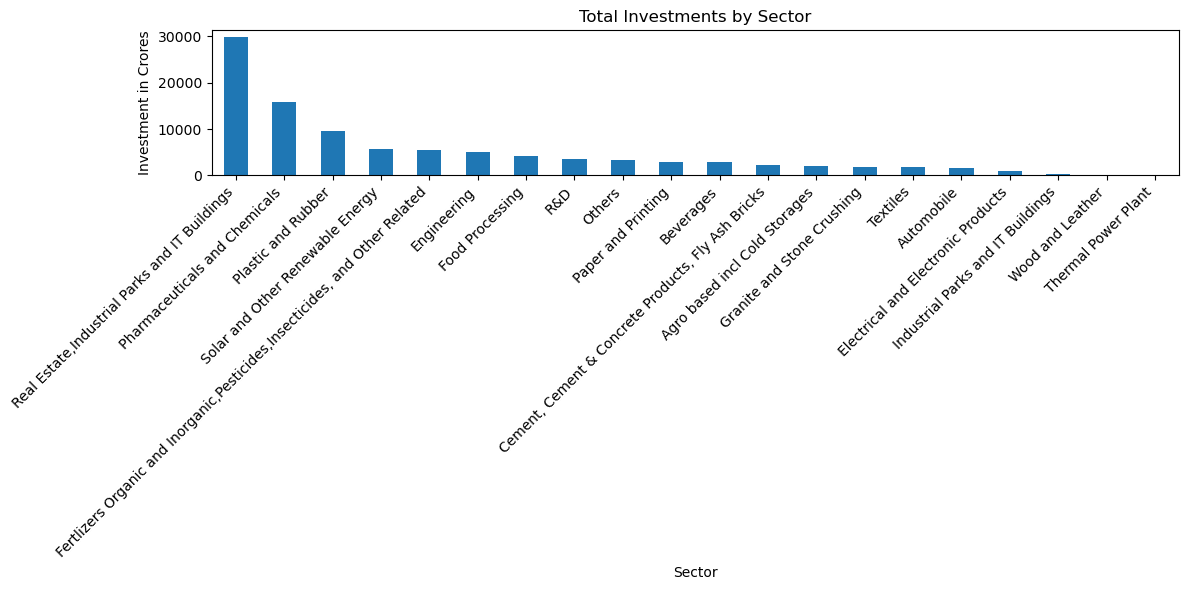

In [18]:
# Plot sector-wise investments
plt.figure(figsize=(12, 6))
bar_plot = sector_investments.sort_values(ascending=False).plot(kind='bar')
plt.title('Total Investments by Sector')
plt.xlabel('Sector')
plt.ylabel('Investment in Crores')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Show the plot
plt.show()



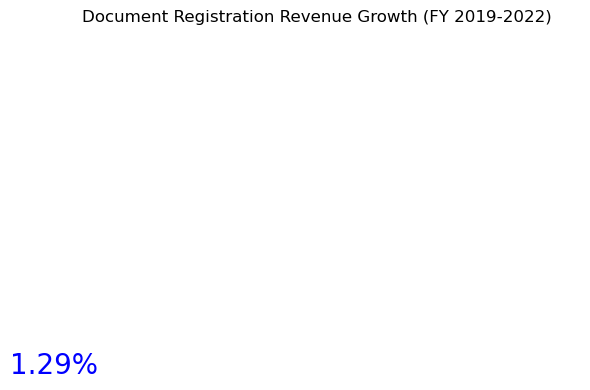

In [25]:
# document registration revenue growth
plt.figure(figsize=(6, 4))
plt.text(0, 0, f'{revenue_growth:.2f}%', fontsize=20, color='blue', ha='center', va='center')
plt.title('Document Registration Revenue Growth (FY 2019-2022)')
plt.axis('off')  # Turn off axis labels and ticks
plt.tight_layout()

# Show the plot
plt.show()



<Figure size 1000x600 with 0 Axes>

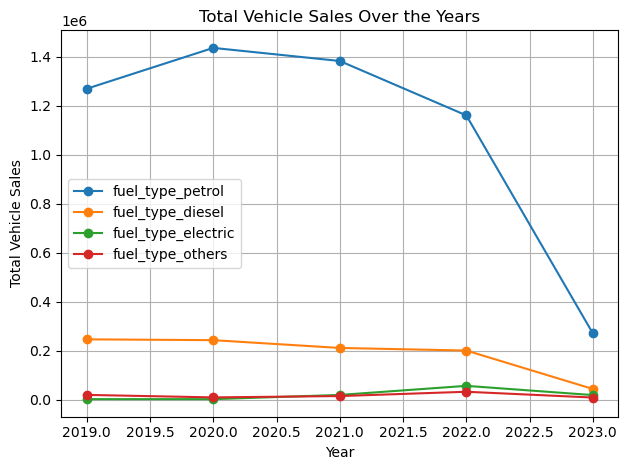

In [12]:

# total vehicle sales over the years
plt.figure(figsize=(10, 6))
total_vehicle_sales.plot(marker='o')
plt.title('Total Vehicle Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Vehicle Sales')
plt.grid(True)
plt.tight_layout()


In [13]:

# Investment 
print("Investment Insights:")
print("Telangana's growth among different sectors:")
print(sector_investments)
print("\n")

'''Insight:
Telangana's growth is diversified across sectors,
with Pharmaceuticals and Chemicals leading at 15858.06 crores. 
The Real Estate, Industrial Parks, and IT sector attracted substantial investments, around 29778.17 crores.

Suggestion:
To ensure sustained growth, the government should prioritize infrastructure development, 
innovation in R&D, and promote renewable energy adoption for a balanced economic expansion.'''

Investment Insights:
Telangana's growth among different sectors:
sector
Agro based incl Cold Storages                                                   2100.4685
Automobile                                                                      1575.2121
Beverages                                                                       2809.7994
Cement, Cement & Concrete Products, Fly Ash Bricks                              2238.6345
Electrical and Electronic Products                                               941.6272
Engineering                                                                     5024.6131
Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related     5418.3977
Food Processing                                                                 4115.9122
Granite and Stone Crushing                                                      1922.3752
Industrial Parks and IT Buildings                                                280.4090
Others                      

In [14]:
# Document Registration 
print("Document Registration Insights:")
print(f"Revenue growth from document registration: {revenue_growth:.2%}")
print("\n")

'''Insight: The document registration revenue experienced significant growth of 129.22%,
indicating a strong demand for property transactions and legal documentation.

Suggestion: To sustain this growth, 
the government should focus on streamlining registration processes, 
improving transparency, and investing in digital platforms for efficient document handling.'''

Document Registration Insights:
Revenue growth from document registration: 129.22%




In [15]:

# Vehicle Sales 
print("Vehicle Sales Insights:")
print("Total vehicle sales by year:")
print(total_vehicle_sales)
print("\n")

# Show plots 
plt.show()

'''insigt:
The sales of electric vehicles have exhibited a remarkable surge over the years, particularly in 2022, 
with a substantial increase of 74.2% compared to the previous year, 
indicating a growing adoption of sustainable transportation options.

suggestion:
To further boost electric vehicle adoption, 
the government could consider introducing targeted incentives and infrastructure development, 
capitalizing on the evident consumer interest in electric vehicles shown by the substantial
growth in sales during 2022.'''

Vehicle Sales Insights:
Total vehicle sales by year:
      fuel_type_petrol  fuel_type_diesel  fuel_type_electric  fuel_type_others
year                                                                          
2019           1270146            247216                3150             20514
2020           1436822            243924                3084             10262
2021           1383396            212059               20304             15694
2022           1161367            201488               57405             33275
2023            271534             44697               19716              9724




'Give Insights to the Telangana government that would help them to make data-informed decisions that would further support the growth of the state.'